# Snow drift potential

In [53]:
%matplotlib inline

In [58]:
import netCDF4
import numpy as np
import pylab as plt
plt.rcParams['figure.figsize'] = (14, 5)

Accessing netcdf file via thredds


In [37]:
ncdata = netCDF4.Dataset('http://thredds.met.no/thredds/dodsC/arome25/arome_metcoop_default2_5km_latest.nc')
x_wind_v = ncdata.variables['x_wind_10m']
y_wind_v = ncdata.variables['y_wind_10m']

lat_v = ncdata.variables['latitude']
lon_v = ncdata.variables['longitude']

time_v = ncdata.variables['time']
t = netCDF4.num2date(time_v[:], time_v.units)

Calculating wind speed in one grid cell over the prognosis time


In [38]:
i_x = 200
i_y = 400
c_lat = lat_v[i_x,i_y]
c_lon = lon_v[i_x,i_y]

In [39]:
wind_speed = np.sqrt(x_wind_v[:,i_y,i_x]**2 + y_wind_v[:,i_y,i_x]**2)

Plotting wind speed


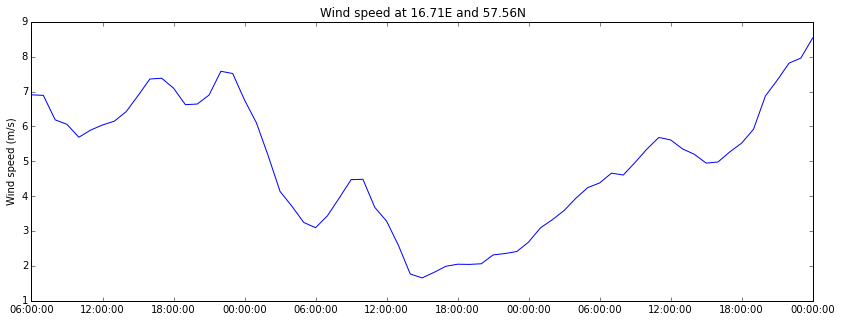

In [59]:
plt.figure()
plt.plot(t, wind_speed)
plt.ylabel('Wind speed (m/s)')
plt.title('Wind speed at {0:.2f}E and {1:.2f}N'.format(c_lon, c_lat))
plt.show()

## Defining drift potential

See [Gompertz function](https://en.wikipedia.org/wiki/Gompertz_function)


In [164]:
def drift_potential(u, a=1.2, b=15, c=.16):
    '''
    Using a Gompertz function (subclass of sigmoid functions) to resample the experimental derived snow transport curve by
    Föhn et al. 1980 of the form 8e-5 * u^3.
    
    u: wind speed in m/s
    a: is an asymptote; something like maximum possible additional snow depth
    b: defines the displacment along the x-axis; kind of a delay before snow transport starts;
        snow surface hardness will influence 'b'
    c: defines the growth rate; a measure for how quickly snow transport increases with increasing wind speeds;
        snow surface ahrdness and concurrent snow fall will influence 'c'
    
    Default values for 'a', 'b', and 'c' represent best fit to Föhn's model.
    
    TODO:
    - link a, b, and c to snow surface conditions available from the seNorge model.
    '''
    
    # Additional loading by wind redistribution on leeward slopes
    hs_wind_foehn = 8e-5 * u**3.0
    hs_wind = a * np.exp(-b * np.exp(-c * u))
    return hs_wind, hs_wind_foehn

Comparison to Föhn's model:


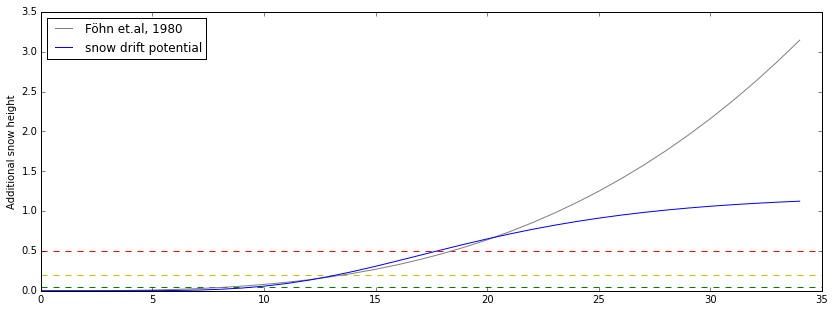

In [163]:
dummy_wind = np.arange(0,35) # m/s
dummy_hs, hs_foehn = drift_potential(dummy_wind, a=1.2, b=15, c=.16)
plt.figure()
plt.axhline(y=0.05, linestyle='--', color='g') # lower limit for little snow transport
plt.axhline(y=0.2, linestyle='--', color='y') # lower limit for intermediate snow transport
plt.axhline(y=0.5, linestyle='--', color='r') # lower limit for severe snow transport
plt.plot(dummy_wind, hs_foehn, color='0.5', label='Föhn et.al, 1980')
plt.plot(dummy_wind, dummy_hs, label='snow drift potential')
plt.ylabel('Additional snow height')
plt.legend(loc=2)
plt.show()

Using real data from AROME model


In [167]:
hs_wind, hsf = drift_potential(wind_speed)

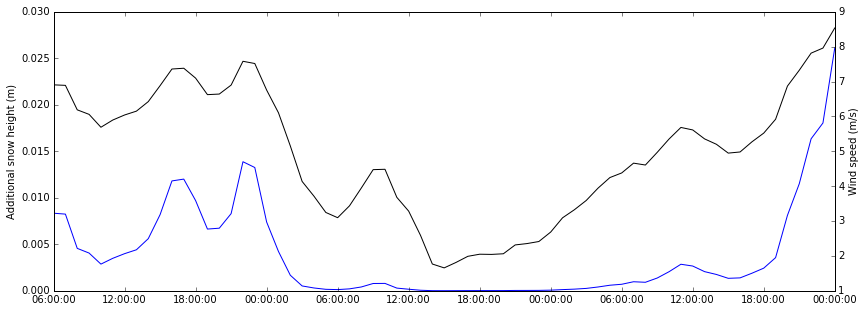

In [171]:
plt.figure()
plt.plot(t, hs_wind)
plt.ylabel('Additional snow height (m)')
ax_wind = plt.gca().twinx()
ax_wind.plot(t, wind_speed, color='k')
ax_wind.set_ylabel('Wind speed (m/s)')
plt.show()

## TODO: Need to sum up over a certain time period - check which time period Föhn uses. 